<a href="https://colab.research.google.com/github/jaimesierrab/Portafolio/blob/main/recomendaci%C3%B3n_de_que_tienda_vender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

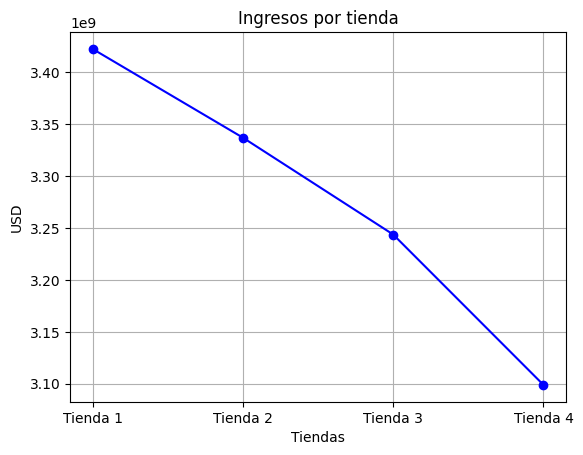

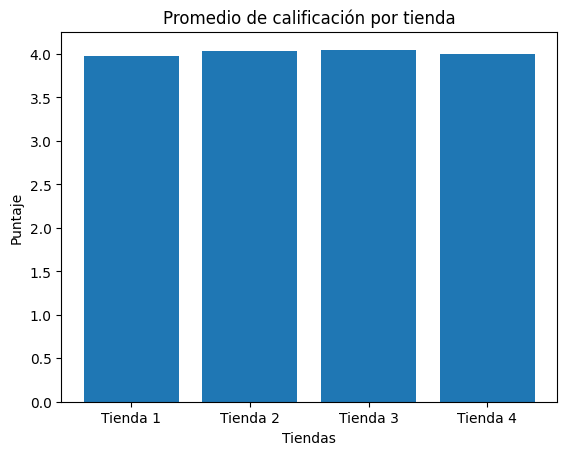

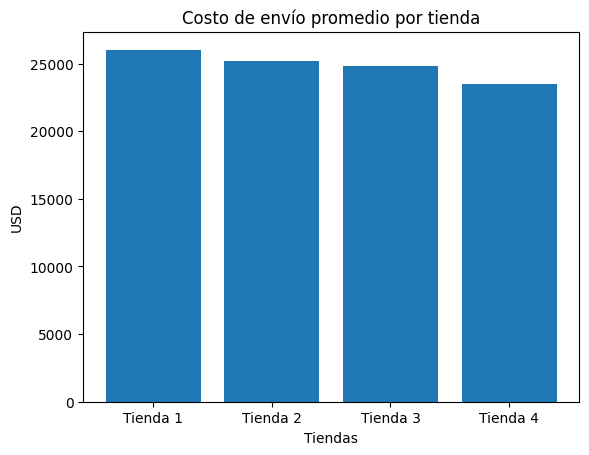


🔍 Recomendación:
Se recomienda vender **Tienda 4**, ya que presenta el menor desempeño económico en términos de ingresos.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos desde URLs
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Crear diccionario de tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Inicializar estructuras para análisis
ingresos = {}
categorias_populares = {}
promedios_calificacion = {}
producto_top = {}
producto_low = {}
envio_promedio = {}

# Análisis por tienda
for nombre, df in tiendas.items():
    df['Ingreso'] = df['Cantidad de cuotas'] * df['Precio']
    ingresos[nombre] = df['Ingreso'].sum()
    categorias_populares[nombre] = df['Categoría del Producto'].value_counts().idxmax()
    promedios_calificacion[nombre] = df['Calificación'].mean()
    producto_top[nombre] = df.groupby('Producto')['Cantidad de cuotas'].sum().idxmax()
    producto_low[nombre] = df.groupby('Producto')['Cantidad de cuotas'].sum().idxmin()
    envio_promedio[nombre] = df['Costo de envío'].mean()

# Mostrar tablas de tuplas
print("Ingresos por tienda:", ingresos)
print("Categorías más populares:", categorias_populares)
print("Promedio de calificación:", promedios_calificacion)
print("Producto más vendido:", producto_top)
print("Producto menos vendido:", producto_low)
print("Costo promedio de envío:", envio_promedio)

# Convertir ingresos a listas ordenadas
tiendas_nombres = list(ingresos.keys())
ingresos_valores = list(ingresos.values())

# Gráfico 1: Ingresos (línea)
plt.plot(range(len(tiendas_nombres)), ingresos_valores, marker='o', linestyle='-', color='blue')
plt.xticks(range(len(tiendas_nombres)), tiendas_nombres)
plt.title("Ingresos por tienda")
plt.ylabel("USD")
plt.xlabel("Tiendas")
plt.grid(True)
plt.show()

# Gráfico 2: Calificaciones (barra)
plt.bar(promedios_calificacion.keys(), promedios_calificacion.values())
plt.title("Promedio de calificación por tienda")
plt.ylabel("Puntaje")
plt.xlabel("Tiendas")
plt.show()

# Gráfico 3: Costo de envío (barra)
plt.bar(envio_promedio.keys(), envio_promedio.values())
plt.title("Costo de envío promedio por tienda")
plt.ylabel("USD")
plt.xlabel("Tiendas")
plt.show()

# Recomendación final
peor_tienda = min(ingresos, key=ingresos.get)

print(f"\n🔍 Recomendación:")
print(f"Se recomienda vender **{peor_tienda}**, ya que presenta el menor desempeño económico en términos de ingresos.")